<a href="https://colab.research.google.com/github/Hebah19/CodSoft/blob/main/Spam_SMS_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, precision_recall_curve
import joblib

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [4]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [5]:
df = pd.read_csv('/content/spam.csv',encoding=('ISO-8859-1'))

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.shape

(5572, 5)

In [8]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [9]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True, axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# finding duplicates
df.duplicated().sum()

403

In [11]:
df= df.drop_duplicates(keep='first')
df.duplicated().sum()

0

In [12]:
df.shape

(5169, 2)

In [13]:
df.describe()

,v1,v2
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [14]:
df['v1'].value_counts()

ham     4516
spam     653
Name: v1, dtype: int64

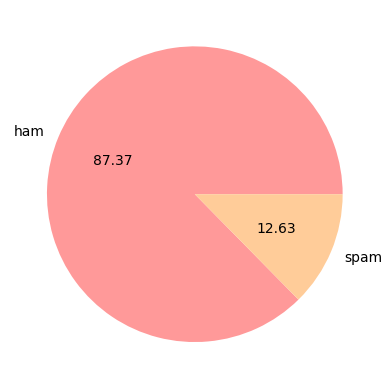

In [15]:
labels=['ham','spam']
colors =[ '#ff9999', '#ffcc99']
plt.pie(df['v1'].value_counts(), labels=labels,autopct="%0.2f", colors=colors)
plt.show()

In [16]:
# Label Encoding
label_encode = LabelEncoder()
labels = label_encode.fit_transform(df.v1)
df['v1'] = labels

In [17]:
df.head()

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
# stemming : is the process of reducing a word to its rootword
portstem = PorterStemmer()

In [19]:
def stemming(v2):
  stemmedcont = re.sub('[^a-zA-Z]',' ',v2)
  # convert upper case to lower case
  stemmedcont = stemmedcont.lower()
  stemmedcont= stemmedcont.split()
  stemmedcont = [portstem.stem(word) for word in stemmedcont if not word in stopwords.words('english')] # removing stopword
  stemmedcont =' '.join(stemmedcont)
  return stemmedcont

In [20]:
df['v2'] = df['v2'].apply(stemming)

In [21]:
print(df['v2'])

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri wkli comp win fa cup final tkt st m...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    nd time tri contact u u pound prize claim easi...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: v2, Length: 5169, dtype: object


In [22]:
x = df['v2']
y = df['v1']

In [23]:
print(x)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri wkli comp win fa cup final tkt st m...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    nd time tri contact u u pound prize claim easi...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: v2, Length: 5169, dtype: object


In [24]:
print(y)

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5169, dtype: int64


In [25]:
from numpy.lib.function_base import vectorize
# converting textual dats to feature vectors
vectorizer = TfidfVectorizer()
vectorizer.fit(x)

x = vectorizer.transform(x)
print(x)

  (0, 6060)	0.24517129496631945
  (0, 5886)	0.19415459400606994
  (0, 4046)	0.24004800434772433
  (0, 2898)	0.283608368159408
  (0, 2794)	0.35120222986216304
  (0, 2222)	0.1960891411830625
  (0, 2185)	0.16428949612077923
  (0, 2148)	0.14014301119494849
  (0, 1162)	0.271310616118712
  (0, 957)	0.29623517065178584
  (0, 732)	0.29623517065178584
  (0, 730)	0.33512539565566796
  (0, 377)	0.26634785345973966
  (0, 188)	0.35120222986216304
  (1, 5982)	0.4431000927770725
  (1, 3743)	0.5625674771645618
  (1, 3718)	0.2848686019861351
  (1, 2926)	0.41888998866688537
  (1, 2761)	0.4801678856553941
  (2, 6026)	0.21760934653906108
  (2, 5993)	0.16095350160140515
  (2, 5629)	0.13630504897076176
  (2, 5474)	0.2537564471752361
  (2, 5361)	0.1285823987975333
  (2, 5072)	0.2243088271059698
  :	:
  (5164, 777)	0.15939723913633064
  (5164, 719)	0.30135262240932337
  (5165, 2431)	0.37639843863524536
  (5165, 2148)	0.29600715859500404
  (5165, 1979)	0.5730566504115094
  (5165, 1690)	0.6650639464537247
  (51

In [26]:
x.shape

(5169, 6221)

In [27]:
y.shape

(5169,)

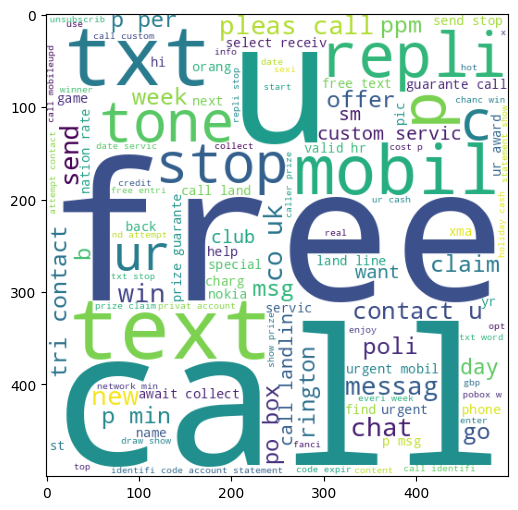

In [31]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['v1'] == 1]['v2'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

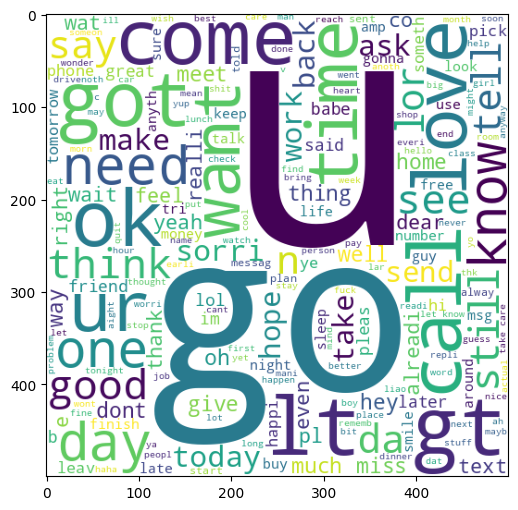

In [92]:
ham_wc = wc.generate(df[df['v1'] == 0]['v2'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=3)

In [38]:
x_train_dense = x_train.toarray()

In [39]:
x_test_dense = x_test.toarray()

In [40]:
print(x.shape,x_train.shape,x_test.shape)

(5169, 6221) (4135, 6221) (1034, 6221)


In [41]:
print(y.shape,y_train.shape,y_test.shape)

(5169,) (4135,) (1034,)


**Model Training **

**1) Naive Bayes**

In [43]:
# Create a Naive Bayes classifier
mnb = MultinomialNB()
mnb.fit(x_train_dense,y_train)

MultinomialNB()

**2) Logistic Regression**

In [46]:
lg = LogisticRegression(max_iter=1000)
lg.fit(x_train_dense,y_train)

LogisticRegression(max_iter=1000)

**3) Support Vector Machine**

In [49]:
sv = svm.SVC(kernel='linear')
sv.fit(x_train_dense, y_train)

SVC(kernel='linear')

**Model Evaluation**

**1) Naive Bayes**

In [52]:
# accuracy training set
y_train_pred1 = mnb.predict(x_train_dense)
acc1 = accuracy_score( y_train, y_train_pred1)
print("Accuracy of Training Data:", acc1)

Accuracy of Training Data: 0.9714631197097945


In [45]:
x_test_pred1 = mnb.predict(x_test_dense)
accuracy1 = accuracy_score(y_test, x_test_pred1)
precision1 = precision_score(y_test, x_test_pred1)
recall1 = recall_score(y_test, x_test_pred1)
f1_1 = f1_score(y_test, x_test_pred1)
print("Accuracy:", accuracy1)
print("Precision:", precision1)
print("Recall:", recall1)
print("f1:", f1_1)

Accuracy: 0.9680851063829787
Precision: 1.0
Recall: 0.7642857142857142
f1: 0.8663967611336032


In [55]:
# confusion matrix
cf_matrix1 = confusion_matrix(y_test, x_test_pred1)
print(cf_matrix1)
tn,fp,fn,tp= cf_matrix1.ravel()
print(tn,fp,fn,tp)

[[894   0]
 [ 33 107]]
894 0 33 107


Text(33.22222222222222, 0.5, 'Correct Label')

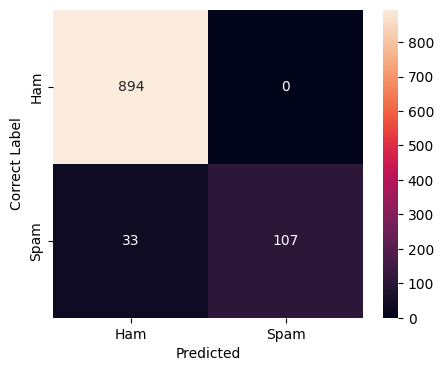

In [59]:
plt.figure(figsize=(5, 4))
sns.heatmap(cf_matrix1, annot=True,xticklabels=["Ham","Spam"],
            yticklabels=["Ham","Spam"] , fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Correct Label')

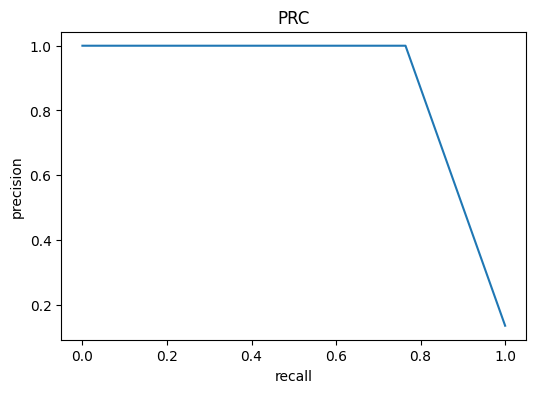

In [97]:
pr, re, thresholds = precision_recall_curve(y_test, x_test_pred1)
plt.figure(figsize = (6,4))
plt.plot(re,pr)
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('PRC')
plt.show()

**2) Logistic Regression**

In [53]:
# accuracy training set
y_train_pred2 = lg.predict(x_train_dense)
acc2 = accuracy_score( y_train, y_train_pred2)
print("Accuracy of Training Data:", acc2)

Accuracy of Training Data: 0.9671100362756953


In [47]:
x_test_pred2 = lg.predict(x_test_dense)
accuracy2 = accuracy_score(y_test, x_test_pred2)
precision2 = precision_score(y_test, x_test_pred2)
recall2 = recall_score(y_test, x_test_pred2)
f1_2 = f1_score(y_test, x_test_pred2)
print("Accuracy:", accuracy2)
print("Precision:", precision2)
print("Recall:", recall2)
print("f1:", f1_2)

Accuracy: 0.9584139264990329
Precision: 1.0
Recall: 0.6928571428571428
f1: 0.8185654008438819


In [60]:
# confusion matrix
cf_matrix2 = confusion_matrix(y_test, x_test_pred2)
print(cf_matrix2)
tn1,fp1,fn1,tp1= cf_matrix2.ravel()
print(tn1,fp1,fn1,tp1)

[[894   0]
 [ 43  97]]
894 0 43 97


Text(33.22222222222222, 0.5, 'Correct Label')

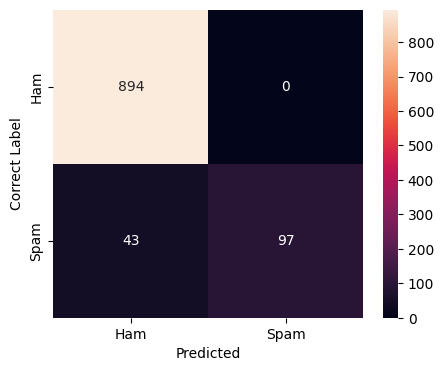

In [61]:
plt.figure(figsize=(5, 4))
sns.heatmap(cf_matrix2, annot=True,xticklabels=["Ham","Spam"],
            yticklabels=["Ham","Spam"] , fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Correct Label')

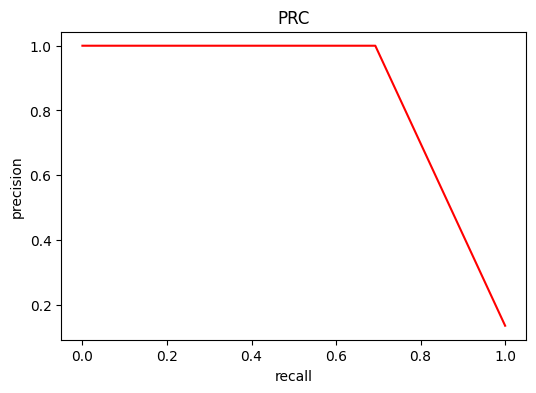

In [98]:
pr1, re1, thresholds1 = precision_recall_curve(y_test, x_test_pred2)
plt.figure(figsize = (6,4))
plt.plot(re1,pr1, color='red')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('PRC')
plt.show()

**3) Support vector machines**

In [54]:
# accuracy training set
y_train_pred3 = sv.predict(x_train_dense)
acc3 = accuracy_score( y_train, y_train_pred3)
print("Accuracy of Training Data:", acc3)

Accuracy of Training Data: 0.9946795646916566


In [50]:
x_test_pred3 = sv.predict(x_test_dense)
accuracy3 = accuracy_score(y_test, x_test_pred3)
precision3 = precision_score(y_test, x_test_pred3)
recall3 = recall_score(y_test, x_test_pred3)
f1_3 = f1_score(y_test, x_test_pred3)
print("Accuracy:", accuracy3)
print("Precision:", precision3)
print("Recall:",recall3)
print("f1:", f1_3)

Accuracy: 0.9816247582205029
Precision: 1.0
Recall: 0.8642857142857143
f1: 0.9272030651340997


In [62]:
# confusion matrix
cf_matrix3 = confusion_matrix(y_test, x_test_pred3)
print(cf_matrix3)
tn2,fp2,fn2,tp2= cf_matrix3.ravel()
print(tn2,fp2,fn2,tp2)

[[894   0]
 [ 19 121]]
894 0 19 121


Text(33.22222222222222, 0.5, 'Correct Label')

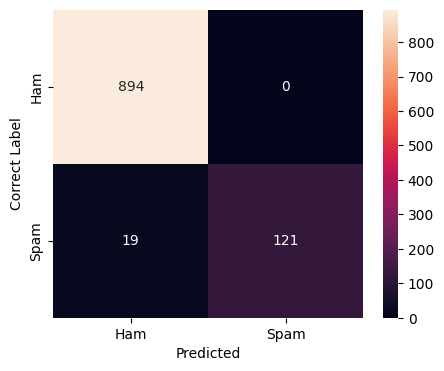

In [63]:
plt.figure(figsize=(5, 4))
sns.heatmap(cf_matrix3, annot=True,xticklabels=["Ham","Spam"],
            yticklabels=["Ham","Spam"] , fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Correct Label')

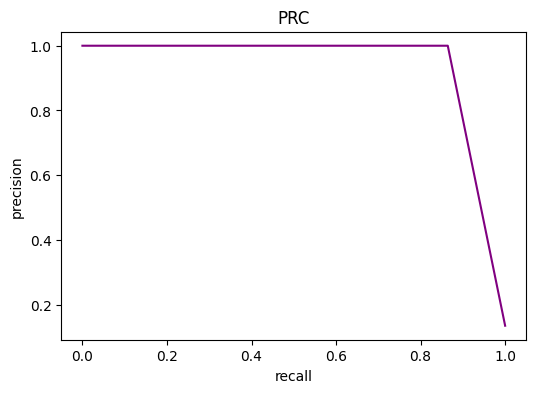

In [99]:
pr2, re2, thresholds2 = precision_recall_curve(y_test, x_test_pred3)
plt.figure(figsize = (6,4))
plt.plot(re2,pr2, color='purple')
plt.xlabel('recall')
plt.ylabel('precision')
plt.title('PRC')
plt.show()

**Final Data**

In [64]:
final_data = pd.DataFrame({'Models':['Naive Bayes','logestic regression','SVM'],'Accuracy':[accuracy1,accuracy2,accuracy3 ],'precision':[precision1,precision2,precision3],'recall':[recall1,recall2,recall3],'f1':[f1_1,f1_2,f1_3]})
print(final_data)

                Models  Accuracy  precision    recall        f1
0          Naive Bayes  0.968085        1.0  0.764286  0.866397
1  logestic regression  0.958414        1.0  0.692857  0.818565
2                  SVM  0.981625        1.0  0.864286  0.927203


In [69]:
final_data_acc = pd.DataFrame({'Models':['Naive Bayes','logestic regression','SVM'],'Acc Training data':[acc1,acc2,acc3],'Acc Testing data':[accuracy1,accuracy2,accuracy3]})

In [70]:
print(final_data_acc)

                Models  Acc Training data  Acc Testing data
0          Naive Bayes           0.971463          0.968085
1  logestic regression           0.967110          0.958414
2                  SVM           0.994680          0.981625


In [80]:
joblib.dump(sv, 'Spam SMS_Prediction')

['Spam SMS_Prediction']

In [83]:
model = joblib.load('Spam SMS_Prediction')


In [96]:
SMS = ["WINNER!! As a valued network customer you have been selected to receivea �900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only."]
# making prediction
sms = vectorizer.transform(SMS)
prediction = model.predict(sms.toarray())
print(prediction)
if (prediction==0):
  print('Ham mail')
if (prediction==1):
  print('Spam mail')

[1]
Spam mail
